In [6]:
%matplotlib inline
import gaussian_process
reload(gaussian_process)
from gaussian_process import GaussianProcess
import numpy as np
import matplotlib.pyplot as pl

In [7]:
# Get current size
fig_size = pl.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
pl.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [27]:
f = lambda x: np.sin(x)

N = 15    # number of training points.
n = 200       # number of test points.
sigma = 0.02    # noise variance.
X = np.random.uniform(-5, 5, size=(N, 1))
y = f(X) + sigma * np.random.randn(N, 1)
Xtest = np.linspace(-5, 5, n).reshape(-1, 1)


In [35]:
def plot_gp(mus, diag_cov):
    pl.plot(X,y,'r+',ms=10)
    pl.plot(Xtest,f(Xtest),'b-')

    pl.gca().fill_between(Xtest.flat,(mus-3*np.sqrt(diag_covs)).flat,
                      (gp.mus+3*np.sqrt(diag_cov)).flat, 
                      where=None, color="#dddddd")
    pl.show()

In [36]:
def plot_samples(gp,title,axis=[-5,5,-3,3]):
    
    ns=50
    f_post = gp.sample(Xtest, ns)
    pl.plot(Xtest,f_post)
    pl.axis(axis)
    pl.title(title)
    pl.show()

In [37]:
gp = GaussianProcess(kernel_type='sq_exp', kernel_params={'l':1,'tau':1.0},sigma=0.1)
gp.fit(X, y)
mus, covs = gp.predict(Xtest)
diag_covs=np.diag(covs).reshape(-1,1)

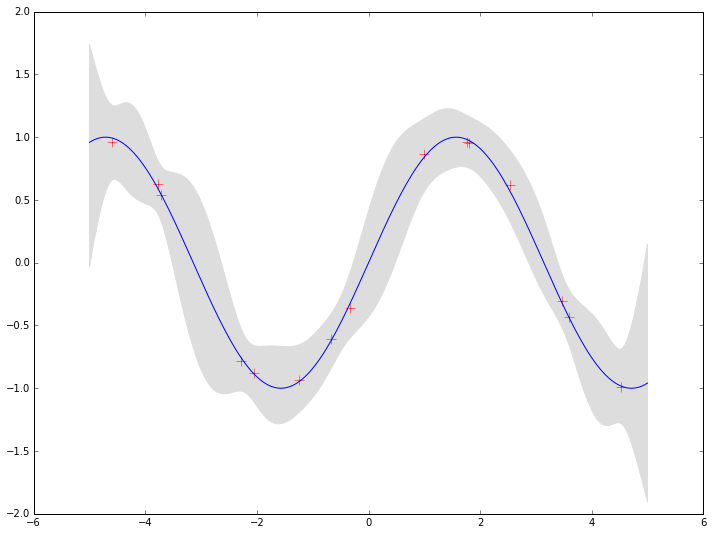

In [38]:
plot_gp(mus,diag_covs)

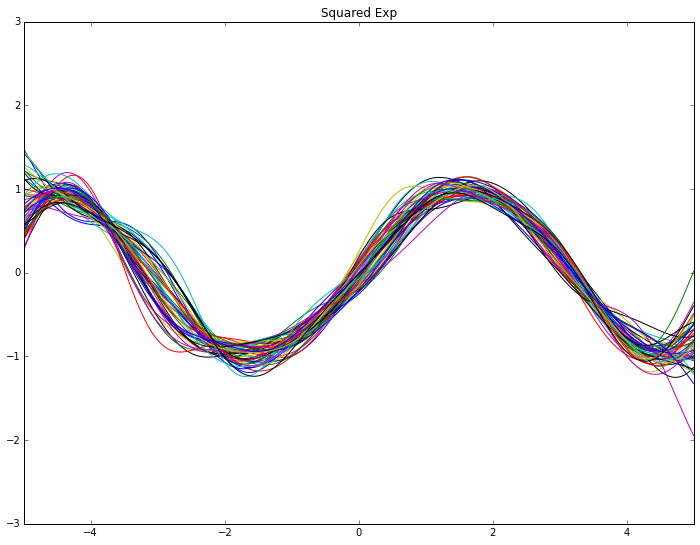

In [39]:
plot_samples(gp,'Squared Exp' )

In [40]:
gp = GaussianProcess(kernel_type='exp',kernel_params={'tau':1,'l':1.0},sigma=0.002)
gp.fit(X, y)
mus, covs = gp.predict(Xtest)
diag_covs=np.diag(covs).reshape(-1,1)

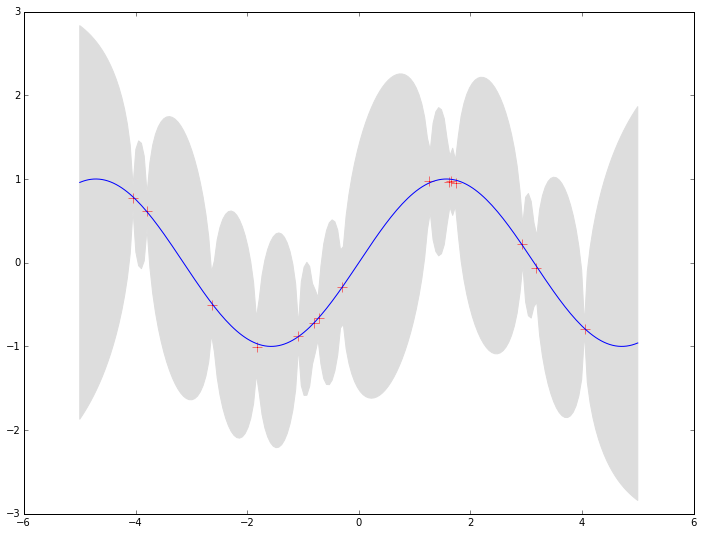

In [15]:
plot_gp(mus,diag_covs)

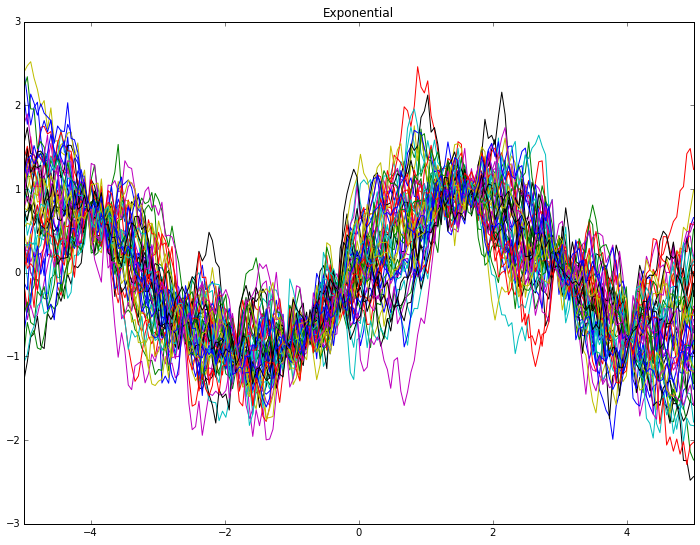

In [16]:
plot_samples(gp,'Exponential')

In [17]:
gp = GaussianProcess(kernel_type='spherical',kernel_params={'theta':7.0,'tau':1},sigma=0.1)
gp.fit(X, y)
mus, covs = gp.predict(Xtest)
diag_covs=np.diag(covs).reshape(-1,1)

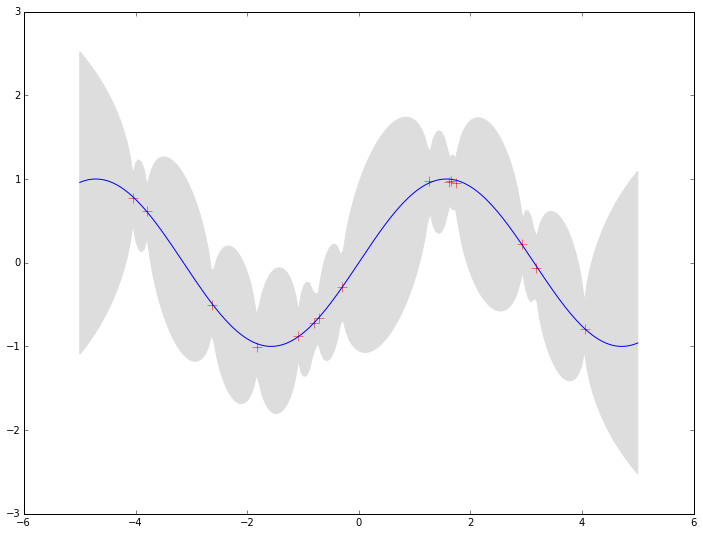

In [18]:
plot_gp(mus,diag_covs)

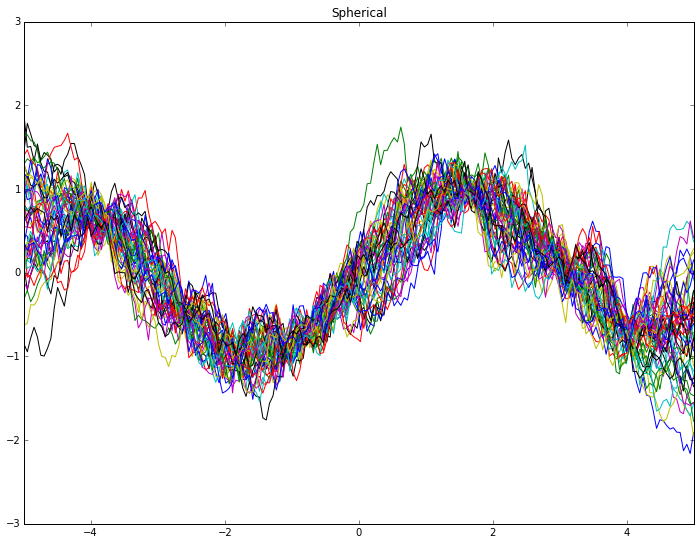

In [19]:
plot_samples(gp,'Spherical')

In [20]:
f = lambda x: -2 * x + 3

N = 7     # number of training points.
n = 200       # number of test points.
sigma = 0.01   # noise variance.
X = np.random.uniform(-1, 1, size=(N, 1))
y = f(X) + sigma * np.random.randn(N, 1)
Xtest = np.linspace(-1, 1, n).reshape(-1, 1)

gp = GaussianProcess(kernel_type='linear',kernel_params={'sigma':3.0,'tau':4.0,'c':5 * np.ones(X.shape[1])},sigma=0.2)
gp.fit(X, y)
mus, covs = gp.predict(Xtest)
diag_covs=np.diag(covs).reshape(-1,1)

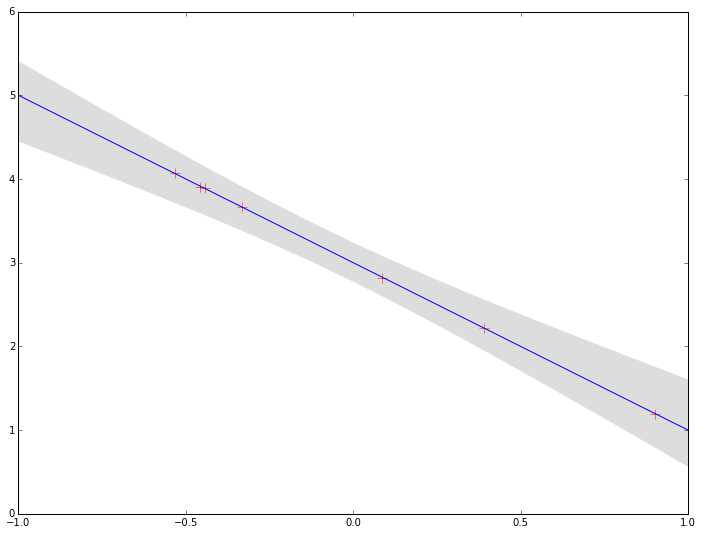

In [21]:
plot_gp(mus,diag_covs)

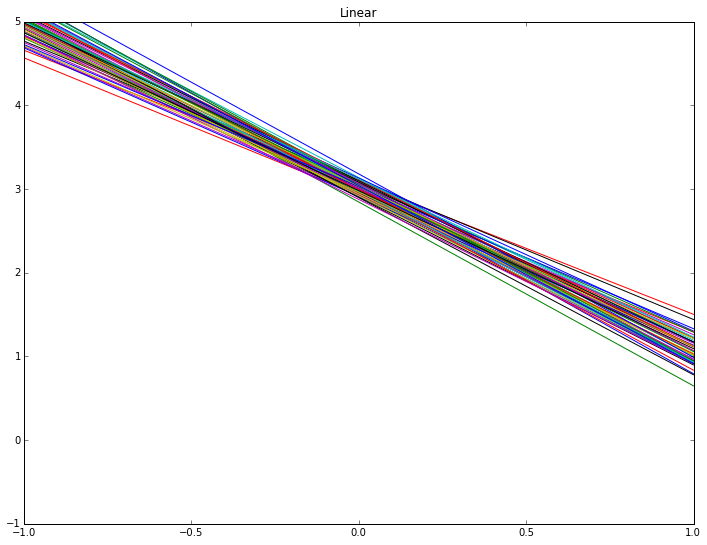

In [22]:
plot_samples(gp,'Linear',axis=[-1,1,-1,5])

In [33]:
gp = GaussianProcess(kernel_type='matern52',sigma=0.1)
gp.fit(X, y)
mus, covs = gp.predict(Xtest)
diag_covs=np.diag(covs).reshape(-1,1)

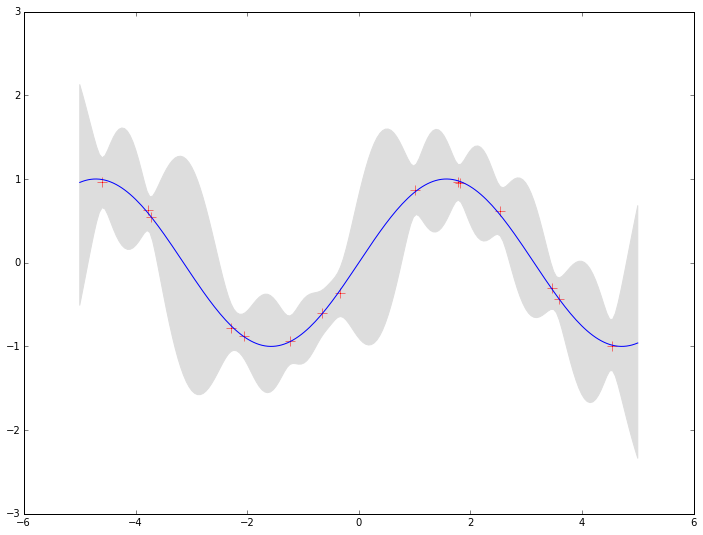

In [34]:
plot_gp(mus,diag_covs)